In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost.sklearn import XGBClassifier
import warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Hiring_Challenge.csv to Hiring_Challenge.csv


In [3]:
import io
raw_data = pd.read_csv(io.BytesIO(uploaded['Hiring_Challenge.csv']))
raw_data.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [4]:

#using the seaborn style for graphs
plt.style.use("seaborn")

In [5]:
raw_data.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [6]:
##looking for any missing values
raw_data.isnull().sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    object 
 1   C2      690 non-null    object 
 2   C3      690 non-null    float64
 3   C4      690 non-null    object 
 4   C5      690 non-null    object 
 5   C6      690 non-null    object 
 6   C7      690 non-null    object 
 7   C8      690 non-null    float64
 8   C9      690 non-null    object 
 9   C10     690 non-null    object 
 10  C11     690 non-null    int64  
 11  C12     690 non-null    object 
 12  C13     690 non-null    object 
 13  C14     690 non-null    object 
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(2), int64(3), object(11)
memory usage: 86.4+ KB


###Exploratory Data Analysis


In [8]:
## basic descriptive statistics
raw_data.describe()

,C3,C8,C11,C15,Hired
count,690.000000,690.000000,690.00000,690.000000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507,0.444928
std,4.978163,3.346513,4.86294,5210.102598,0.497318
min,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,0.165000,0.00000,0.000000,0.000000
50%,2.750000,1.000000,0.00000,5.000000,0.000000
75%,7.207500,2.625000,3.00000,395.500000,1.000000
max,28.000000,28.500000,67.00000,100000.000000,1.000000


In [9]:
#supressing all the warnings
import warnings
warnings.filterwarnings('ignore')

In [10]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Hired"):
    """A function for plotting the distribution of numerical variables and its effect on Hired"""
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))    

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)
    
    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)
    
    plt.show()

In [11]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "Hired"):
    
    """A function for Plotting the effect of variables(categorical data) on attrition """
    
    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))
    
    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Hired",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Hired",ax=ax[0])
        
    ax[0].set_title("Comparision of " + segment_by + " vs " + "Hired")
    
    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)
        
    ax[1].set_title("Hired rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Hired)")
    plt.tight_layout()

    plt.show()

###Analyizing the Numerical variables
 

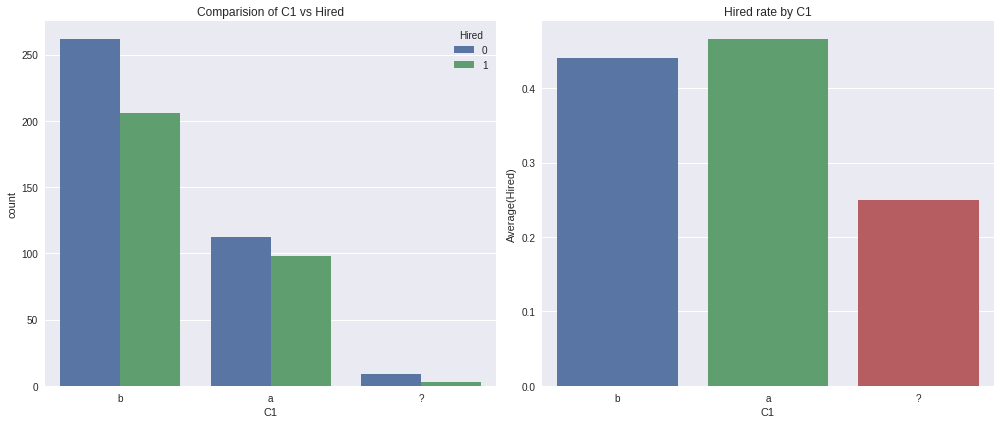

In [12]:
CategoricalVariables_targetPlots(raw_data,segment_by="C1")

*There are some missing data "?" which should clean in preprocessing 


check for "?" in all columns


In [13]:
raw_data.isin(['?']).any()

C1        True
C2        True
C3       False
C4        True
C5        True
C6        True
C7        True
C8       False
C9       False
C10      False
C11      False
C12      False
C13      False
C14       True
C15      False
Hired    False
dtype: bool

###handle missing value using mode and median value


In [14]:
# create list for numerical and categorical column
numerical_col=['C2','C3','C8','C11','C14','C15']
categorical_coloumns= ['C1','C4','C5','C6','C7','C9','C10','C12','C13','Hired']

In [15]:
raw_data_clean=raw_data.copy()

In [16]:
# convert "?" to null value
raw_data_clean=raw_data_clean.replace(to_replace="?",value=np.NaN)

In [17]:
# again check for null 
print(raw_data_clean.isnull().sum())

C1       12
C2       12
C3        0
C4        6
C5        6
C6        9
C7        9
C8        0
C9        0
C10       0
C11       0
C12       0
C13       0
C14      13
C15       0
Hired     0
dtype: int64


In [18]:
raw_data_clean.isin(['?']).sum()

C1       0
C2       0
C3       0
C4       0
C5       0
C6       0
C7       0
C8       0
C9       0
C10      0
C11      0
C12      0
C13      0
C14      0
C15      0
Hired    0
dtype: int64

In [19]:
raw_data_clean.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [20]:
for i in numerical_col:
  raw_data_clean[i].fillna(raw_data_clean[i].median(),inplace = True)
# categorical_coloumns col
for i in categorical_coloumns:
  raw_data_clean[i].fillna(raw_data_clean[i].mode()[0],inplace = True)


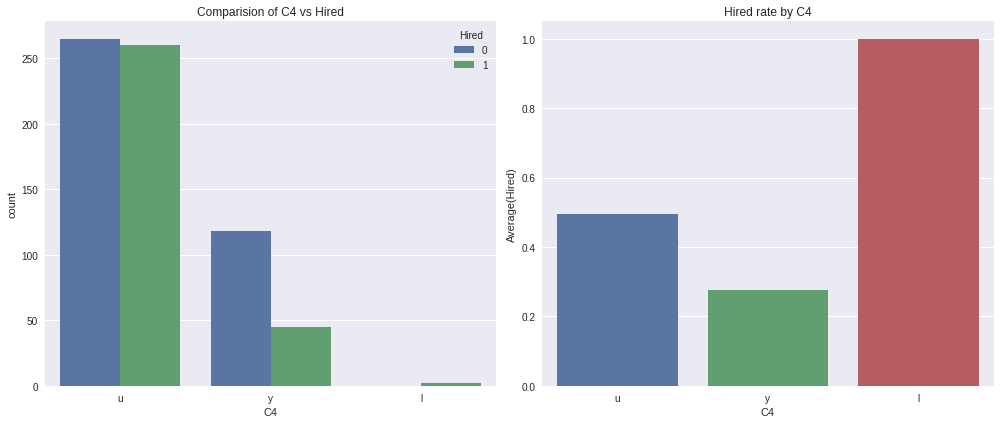

In [21]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C4")

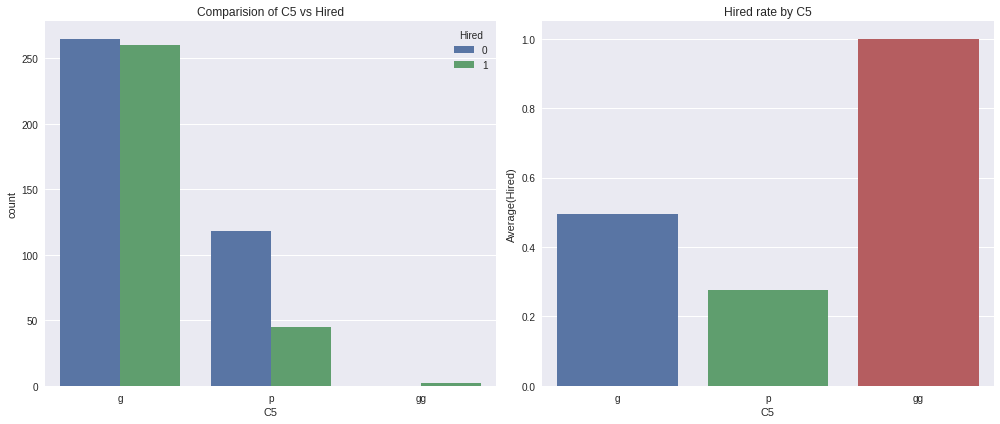

In [22]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C5")

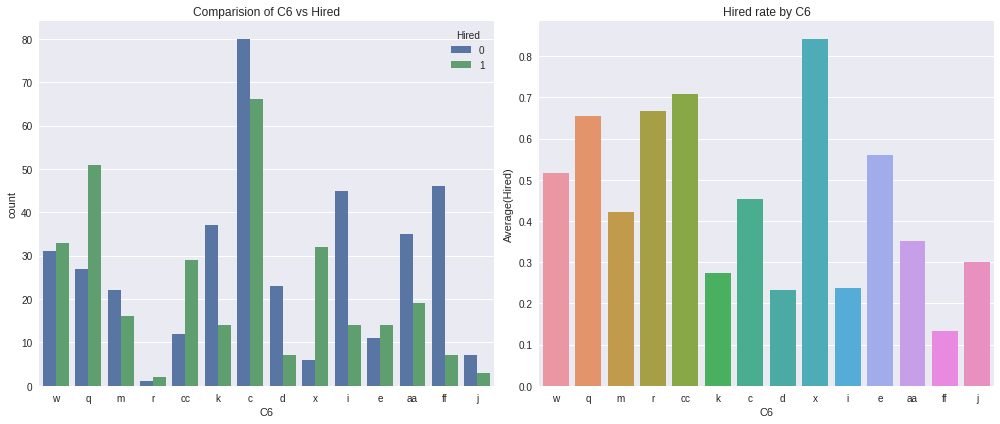

In [23]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C6")

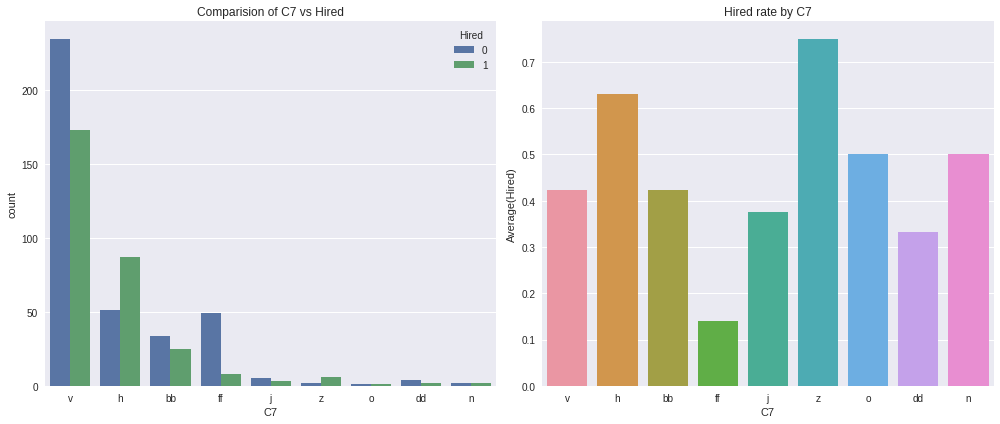

In [24]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C7")

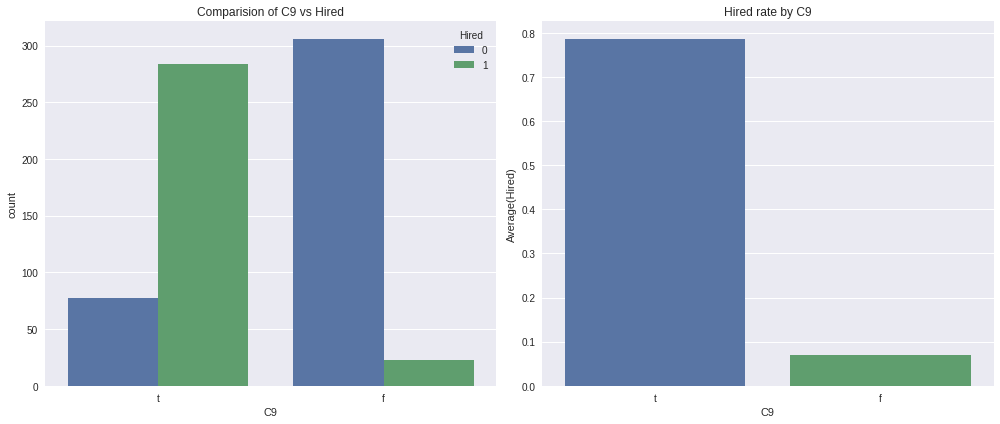

In [25]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C9")

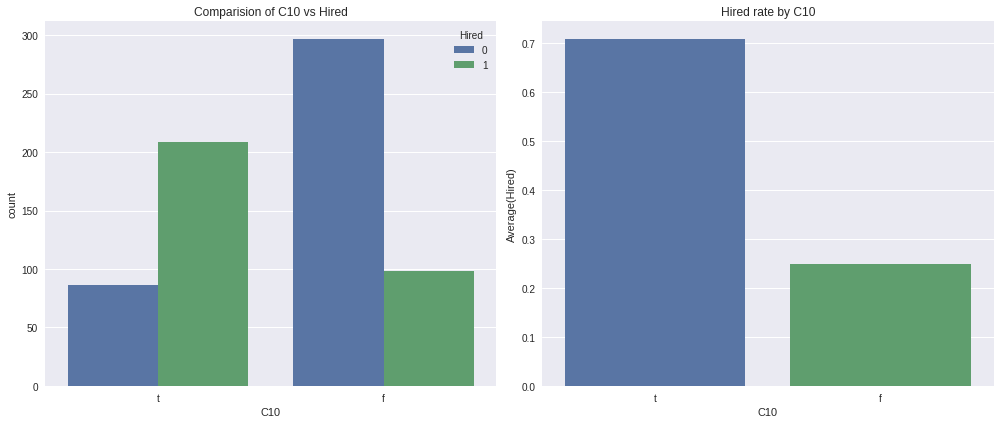

In [26]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C10")

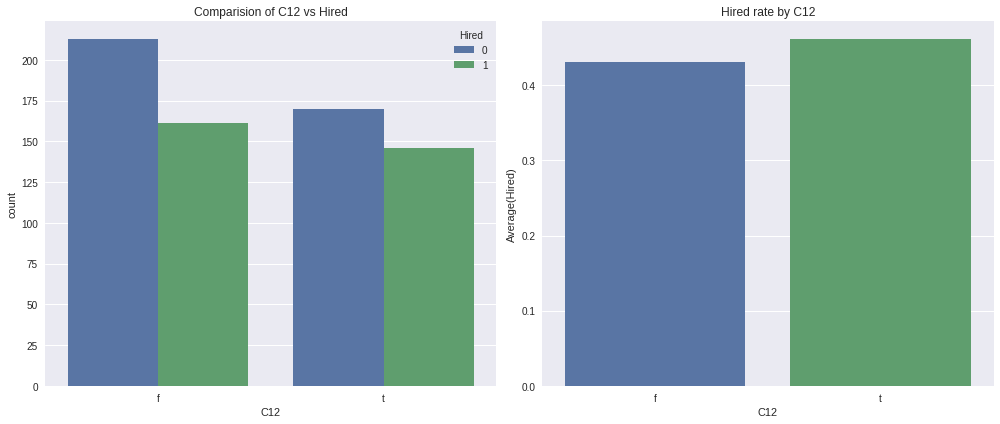

In [27]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C12")

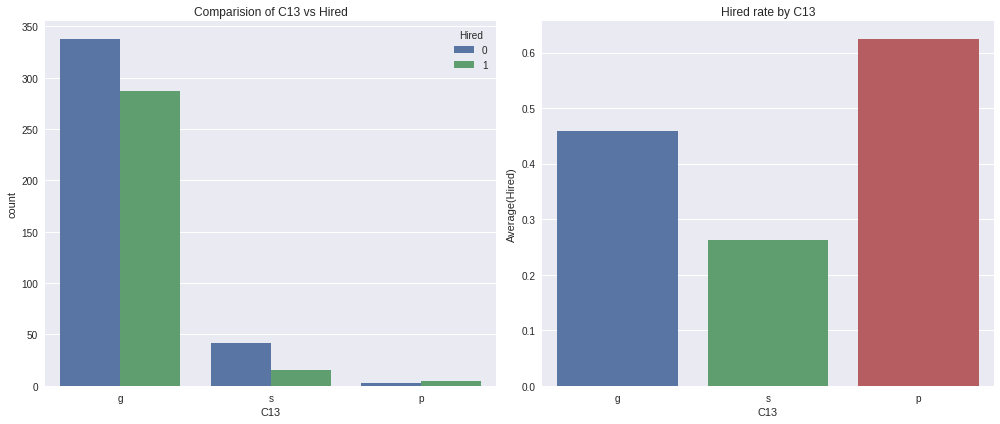

In [28]:
CategoricalVariables_targetPlots(raw_data_clean,segment_by="C13")

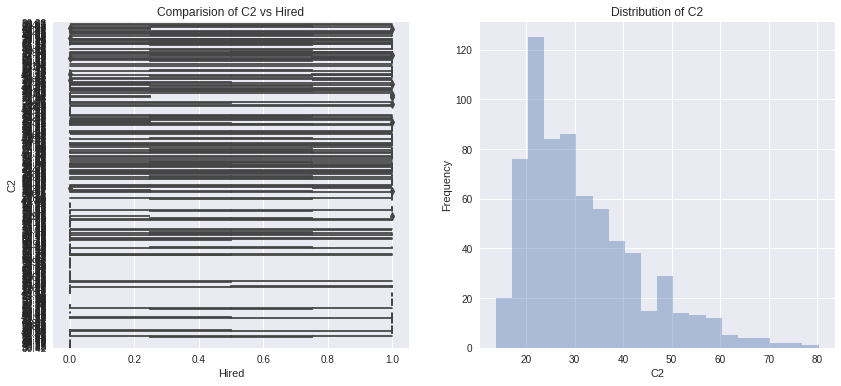

In [29]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C2")

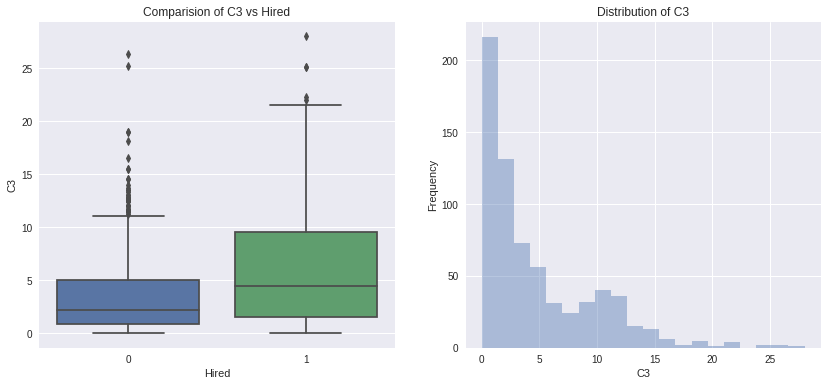

In [30]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C3")

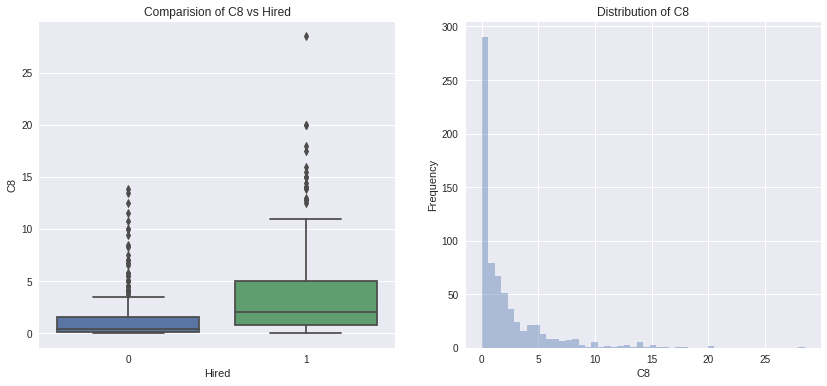

In [31]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C8")

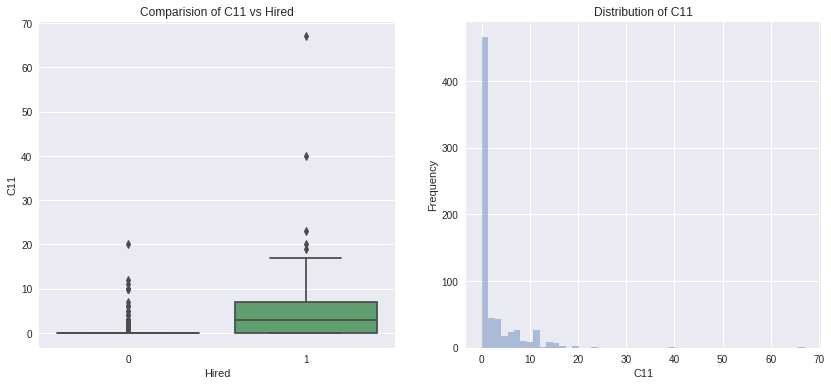

In [32]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C11")

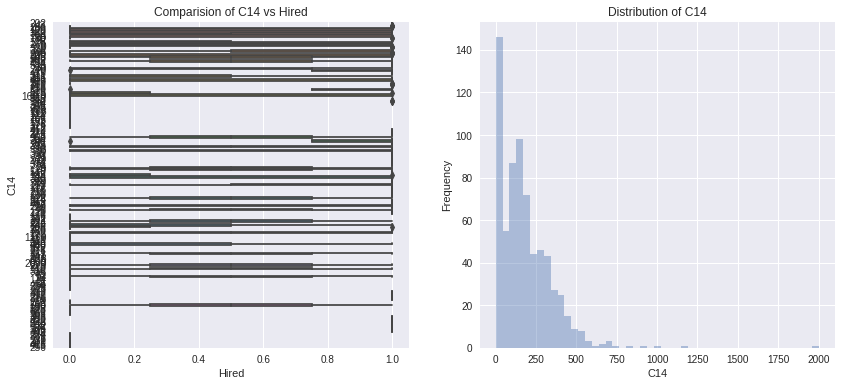

In [33]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C14")

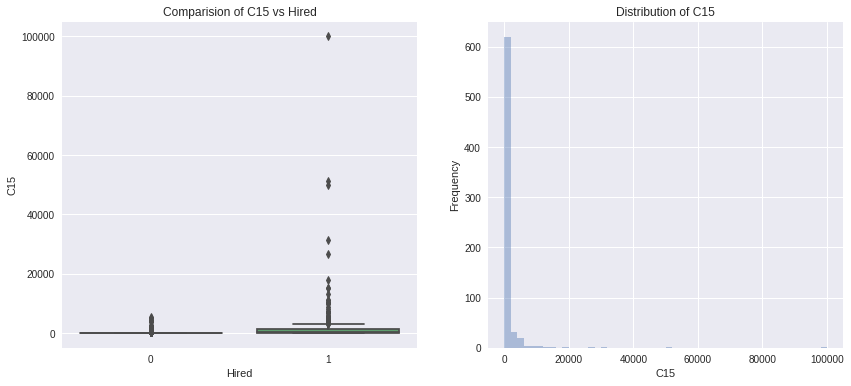

In [34]:
NumericalVariables_targetPlots(raw_data_clean,segment_by="C15")

In [35]:
# convert category data to numeric

label_encoder = LabelEncoder() 
for i in categorical_coloumns:
  raw_data_clean[i]= label_encoder.fit_transform(raw_data_clean[i])

In [36]:
raw_data_clean.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,Hired
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43,560,1
2,0,24.5,0.500,1,0,10,3,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120,0,1


In [37]:
raw_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    int64  
 1   C2      690 non-null    object 
 2   C3      690 non-null    float64
 3   C4      690 non-null    int64  
 4   C5      690 non-null    int64  
 5   C6      690 non-null    int64  
 6   C7      690 non-null    int64  
 7   C8      690 non-null    float64
 8   C9      690 non-null    int64  
 9   C10     690 non-null    int64  
 10  C11     690 non-null    int64  
 11  C12     690 non-null    int64  
 12  C13     690 non-null    int64  
 13  C14     690 non-null    object 
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(2), int64(12), object(2)
memory usage: 86.4+ KB


In [38]:
# convert C2 and C14 column to numeric
raw_data_clean['C2']= pd.to_numeric(raw_data_clean['C2'])
raw_data_clean['C14']=pd.to_numeric(raw_data_clean['C14'])
raw_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      690 non-null    int64  
 1   C2      690 non-null    float64
 2   C3      690 non-null    float64
 3   C4      690 non-null    int64  
 4   C5      690 non-null    int64  
 5   C6      690 non-null    int64  
 6   C7      690 non-null    int64  
 7   C8      690 non-null    float64
 8   C9      690 non-null    int64  
 9   C10     690 non-null    int64  
 10  C11     690 non-null    int64  
 11  C12     690 non-null    int64  
 12  C13     690 non-null    int64  
 13  C14     690 non-null    float64
 14  C15     690 non-null    int64  
 15  Hired   690 non-null    int64  
dtypes: float64(4), int64(12)
memory usage: 86.4 KB


In [39]:
# function for outliner
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [40]:
# outlier value 
for i in numerical_col:
  outlier_pt=detect_outliers(raw_data_clean[i])
  print(i,outlier_pt)
  print(len(outlier_pt))


C2 [67.75, 68.67, 71.58, 69.17, 69.5, 74.83, 80.25, 76.75, 73.42]
9
C3 [67.75, 68.67, 71.58, 69.17, 69.5, 74.83, 80.25, 76.75, 73.42, 28.0, 25.125, 21.0, 25.085, 21.5, 26.335, 22.0, 25.21, 22.29, 20.0]
19
C8 [67.75, 68.67, 71.58, 69.17, 69.5, 74.83, 80.25, 76.75, 73.42, 28.0, 25.125, 21.0, 25.085, 21.5, 26.335, 22.0, 25.21, 22.29, 20.0, 15.0, 14.415, 28.5, 12.5, 13.5, 14.0, 13.0, 15.0, 15.0, 12.5, 15.5, 14.0, 18.0, 20.0, 13.875, 14.0, 20.0, 13.875, 16.0, 12.75, 12.75, 17.5]
41
C11 [67.75, 68.67, 71.58, 69.17, 69.5, 74.83, 80.25, 76.75, 73.42, 28.0, 25.125, 21.0, 25.085, 21.5, 26.335, 22.0, 25.21, 22.29, 20.0, 15.0, 14.415, 28.5, 12.5, 13.5, 14.0, 13.0, 15.0, 15.0, 12.5, 15.5, 14.0, 18.0, 20.0, 13.875, 14.0, 20.0, 13.875, 16.0, 12.75, 12.75, 17.5, 17, 17, 40, 23, 20, 67, 20, 19]
49
C14 [67.75, 68.67, 71.58, 69.17, 69.5, 74.83, 80.25, 76.75, 73.42, 28.0, 25.125, 21.0, 25.085, 21.5, 26.335, 22.0, 25.21, 22.29, 20.0, 15.0, 14.415, 28.5, 12.5, 13.5, 14.0, 13.0, 15.0, 15.0, 12.5, 15.5, 14.0,

there are too many outlier but due to low dataset size we are keeping outlier and normilize it before send in model


###Feature selection

In [41]:
vt = feature_selection.VarianceThreshold(threshold=.2)


In [42]:
vt.fit_transform(raw_data_clean)
vt.variances_

array([2.11720227e-01, 1.40461543e+02, 2.47461932e+01, 1.84685990e-01,
       7.21856753e-01, 1.83410124e+01, 6.29463558e+00, 1.11829210e+01,
       2.49462298e-01, 2.44749002e-01, 2.36139130e+01, 2.48233564e-01,
       3.10766646e-01, 2.96065215e+04, 2.71058283e+07, 2.46967024e-01])

###Chi-Square for Non-negative feature & class

In [43]:
#store the numerical variables data in seperate dataset
numeric_raw_data_clean = raw_data_clean[numerical_col]
categorical_raw_data_clean = raw_data_clean[categorical_coloumns]


In [44]:
categorical_raw_data_clean.head()

,C1,C4,C5,C6,C7,C9,C10,C12,C13,Hired
0,1,1,0,12,7,1,1,0,0,1
1,0,1,0,10,3,1,1,0,0,1
2,0,1,0,10,3,1,0,0,0,1
3,1,1,0,12,7,1,1,1,0,1
4,1,1,0,12,7,1,0,0,2,1


In [45]:
chi2, pval = feature_selection.chi2(categorical_raw_data_clean.drop('Hired',axis=1),categorical_raw_data_clean.Hired)
cat_chi2_list=chi2.tolist()
for i in range(len(cat_chi2_list)):
  print(categorical_coloumns[i],cat_chi2_list[i])

C1 0.17580965462107162
C4 3.9009940703326516
C5 35.91272772832678
C6 37.78233844173285
C7 0.0006386946133813225
C9 170.74638754951758
C10 82.96584366867756
C12 0.37404820528245675
C13 12.33864565773354


*Higher value means more important feature for target


######ANOVA using f_classif


In [46]:
chi2, pval = feature_selection.f_classif(numeric_raw_data_clean,categorical_raw_data_clean.Hired)
num_chi2_list=chi2.tolist()
for i in range(len(num_chi2_list)):
  print(numerical_col[i],num_chi2_list[i])

C2 19.036443763921326
C3 30.58071614047493
C8 79.84887878240937
C11 136.11898752622923
C14 6.955427305131816
C15 21.90442200289265


##Mutual Information for classification using mutual_info_classification¶


In [47]:
feature_selection.mutual_info_classif(raw_data_clean.drop('Hired',axis=1), raw_data_clean.Hired)

array([0.        , 0.        , 0.04015077, 0.04632227, 0.03381534,
       0.07022932, 0.05006977, 0.07582319, 0.29239224, 0.11276006,
       0.1341728 , 0.03635253, 0.03589481, 0.02022696, 0.10854477])

##remove col C1,C7,C12 from cat and c14 from numeric


---



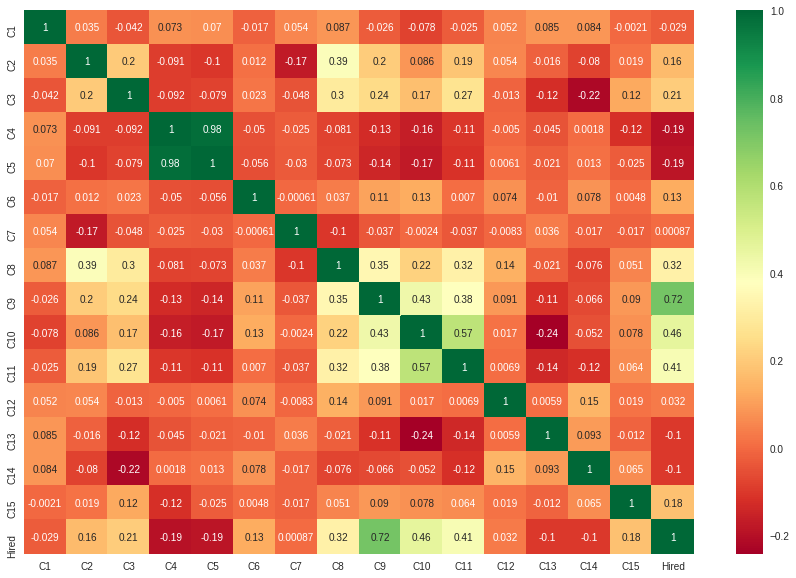

In [48]:
 import seaborn as sns
plt.figure(figsize=(15,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(raw_data_clean.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap


##remove column which is not use in model


In [49]:
raw_data_clean_feature=raw_data_clean.drop(columns=['C1','C7','C12','C14'],axis=1)
raw_data_clean_feature.head()

,C2,C3,C4,C5,C6,C8,C9,C10,C11,C13,C15,Hired
0,30.83,0.000,1,0,12,1.25,1,1,1,0,0,1
1,58.67,4.460,1,0,10,3.04,1,1,6,0,560,1
2,24.50,0.500,1,0,10,1.50,1,0,0,0,824,1
3,27.83,1.540,1,0,12,3.75,1,1,5,0,3,1
4,20.17,5.625,1,0,12,1.71,1,0,0,2,0,1


##convert Category feature to one hot encoder 

In [50]:
raw_data_clean_feature=pd.get_dummies(raw_data_clean_feature,columns=['C4','C5','C6','C9','C10','C13'],drop_first=True)


In [51]:
raw_data_clean_feature

,C2,C3,C8,C11,C15,Hired,C4_1,C4_2,C5_1,C5_2,C6_1,C6_2,C6_3,C6_4,C6_5,C6_6,C6_7,C6_8,C6_9,C6_10,C6_11,C6_12,C6_13,C9_1,C10_1,C13_1,C13_2
0,30.83,0.000,1.25,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,58.67,4.460,3.04,6,560,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,24.50,0.500,1.50,0,824,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,27.83,1.540,3.75,5,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,21.08,10.085,1.25,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
686,22.67,0.750,2.00,2,394,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
687,25.25,13.500,2.00,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
688,17.92,0.205,0.04,0,750,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 ###standarized numerical feature

In [52]:
scaler = StandardScaler()
raw_data_clean_feature[['C2', 'C3','C8','C11','C15']] = scaler.fit_transform(raw_data_clean_feature[['C2', 'C3','C8','C11','C15']])

In [53]:
raw_data_clean_feature[0:20]

,C2,C3,C8,C11,C15,Hired,C4_1,C4_2,C5_1,C5_2,C6_1,C6_2,C6_3,C6_4,C6_5,C6_6,C6_7,C6_8,C6_9,C6_10,C6_11,C6_12,C6_13,C9_1,C10_1,C13_1,C13_2
0,-0.057723,-0.956613,-0.291083,-0.288101,-0.195413,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
1,2.291317,-0.060051,0.244190,0.740830,-0.087852,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
2,-0.591826,-0.856102,-0.216324,-0.493887,-0.037144,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,-0.310853,-0.647038,0.456505,0.535044,-0.194837,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,-0.957176,0.174141,-0.153526,-0.493887,-0.195413,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
5,0.047747,-0.152521,0.082711,-0.493887,-0.195413,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
6,0.139718,-0.747549,1.278852,-0.493887,5.813623,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
7,-0.725141,1.372239,-0.652915,-0.493887,0.063695,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1.932717,-0.856102,0.519303,-0.493887,-0.135102,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
9,0.926950,0.031415,0.281570,-0.493887,0.081557,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


##split data and apply model


In [54]:
y=raw_data_clean_feature['Hired']
X=raw_data_clean_feature.drop(['Hired'],axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_predicted=rf.predict(X_test)

In [57]:
target_names=['Non hired','Hired']
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted, target_names=target_names))

[[60  8]
 [16 54]]
              precision    recall  f1-score   support

   Non hired       0.79      0.88      0.83        68
       Hired       0.87      0.77      0.82        70

    accuracy                           0.83       138
   macro avg       0.83      0.83      0.83       138
weighted avg       0.83      0.83      0.83       138



In [58]:
from sklearn.pipeline import Pipeline
pipelines = []
# pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LogisticRegression())])))
# pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('Cart',GradientBoostingClassifier())])))
# pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
# pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestClassifier())])))
# pipelines.append(('ScaledXgb', Pipeline([('Scaler', MinMaxScaler()),('GBM', XGBClassifier())])))
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('Cart',GradientBoostingClassifier())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScaledXgb', Pipeline([('Scaler', StandardScaler()),('GBM', XGBClassifier())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='f1')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.848974 (0.042332)
ScaledGBC: 0.828752 (0.052442)
ScaledKNN: 0.774540 (0.045408)
ScaledCART: 0.848535 (0.053758)
ScaledXgb: 0.841116 (0.041877)


In [59]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,8]

# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.5s finished


{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [62]:
clf = RandomForestClassifier(n_estimators= 40,min_samples_split= 10,min_samples_leaf= 2,max_features= 'sqrt', max_depth= None,bootstrap= False)

In [63]:
clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
target_names=['Non hired','Hired']
print(confusion_matrix(y_test, y_predicted))
print(classification_report(y_test, y_predicted, target_names=target_names))

[[61  7]
 [12 58]]
              precision    recall  f1-score   support

   Non hired       0.84      0.90      0.87        68
       Hired       0.89      0.83      0.86        70

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

